In [ ]:
#Install Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alanherrerat","key":"15a7a3114ed2cedba610cb019d030e68"}'}

In [ ]:
#Create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36            894        105  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing Price Prediction Data                      763KB  2023-11-21 17:56:32           3044         68  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1320        104  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT P

In [ ]:
!kaggle datasets download -d alanherrerat/sum-bottle-dataset

 99% 1.55G/1.55G [00:22<00:00, 161MB/s]
100% 1.55G/1.55G [00:22<00:00, 73.7MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: dataset/train/no bottle/WIN_20231127_18_37_33_Pro.jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_34_Pro.jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_35_Pro (2).jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_35_Pro (3).jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_35_Pro (4).jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_35_Pro.jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_36_Pro (2).jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_36_Pro (3).jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_36_Pro.jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_37_Pro (2).jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_37_Pro (3).jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_37_Pro (4).jpg  
  inflating: dataset/train/no bottle/WIN_20231127_18_37_37_Pro.jpg  
  in

In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
    base_dir = '/tmp'
    bottle_dir = make_dir(os.path.join(base_dir, 'bottle-dataset'))
    train_dir = make_dir(os.path.join(bottle_dir, 'train'))
    validation_dir = make_dir(os.path.join(bottle_dir, 'val'))
    test_dir = make_dir(os.path.join(bottle_dir, 'test'))
    preview_dir = make_dir(os.path.join(bottle_dir, 'preview'))

    train_bottle_dir = make_dir(os.path.join(train_dir, 'Bottles'))
    train_bottle_dir = make_dir(os.path.join(train_dir, 'No bottles'))


    validation_bottle_dir = make_dir(os.path.join(validation_dir, 'Bottles'))
    validation_bottle_dir = make_dir(os.path.join(validation_dir, 'No bottles'))


    test_bottle_dir = make_dir(os.path.join(test_dir, 'Bottles'))
    test_bottle_dir = make_dir(os.path.join(test_dir, 'No bottles'))


except OSError:
    pass

In [ ]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [ ]:
dataset_train_dir = '/content/dataset/train'
dataset_test_dir = '/content/dataset/test'
dataset_valid_dir = '/content/dataset/valid'


In [ ]:
bottles_train_dir = '/tmp/bottle-dataset/train/Bottles'
nobottles_train_dir = '/tmp/bottle-dataset/train/No bottles'
bottles_test_dir = '/tmp/bottle-dataset/test/Bottles'
nobottles_test_dir = '/tmp/bottle-dataset/test/No bottles'
bottles_valid_dir = '/content/dataset/valid/bottle'
nobottles_valid_dir = '/tmp/bottle-dataset/val/No bottles'

print('bottle_train images = ', len(os.listdir(bottles_train_dir)))
print('No bottle_train images = ', len(os.listdir(nobottles_train_dir)))
print('bottle_test images = ', len(os.listdir(bottles_test_dir)))
print('No bottle_test images = ', len(os.listdir(nobottles_test_dir)))
print('bottle_valid images = ', len(os.listdir(bottles_valid_dir)))
print('No bottle_valid images = ', len(os.listdir(nobottles_valid_dir)))


bottle_train images =  0
No bottle_train images =  0
bottle_test images =  0
No bottle_test images =  0
bottle_valid images =  1128
No bottle_valid images =  0


In [ ]:
import shutil

# Rutas de las carpetas
source_folder = '/content/dataset/train/bottle'
destination_folder = '/tmp/bottle-dataset/train/Bottles'

source_folder2 = '/content/dataset/test/bottle'
destination_folder2 = '/tmp/bottle-dataset/test/Bottles'

source_folder3 = '/content/dataset/valid/bottle'
destination_folder3 = '/tmp/bottle-dataset/val/Bottles'

source_folder4 = '/content/dataset/train/no bottle'
destination_folder4 = '/tmp/bottle-dataset/train/No bottles'

source_folder5 = '/content/dataset/test/no bottle'
destination_folder5 = '/tmp/bottle-dataset/test/No bottles'

source_folder6 = '/content/dataset/valid/no bottle'
destination_folder6 = '/tmp/bottle-dataset/val/No bottles'



# Eliminar la carpeta de destino si ya existe
shutil.rmtree(destination_folder, ignore_errors=True)

# Eliminar la carpeta de destino si ya existe
shutil.rmtree(destination_folder2, ignore_errors=True)

# Eliminar la carpeta de destino si ya existe
shutil.rmtree(destination_folder3, ignore_errors=True)

# Eliminar la carpeta de destino si ya existe
shutil.rmtree(destination_folder4, ignore_errors=True)

# Eliminar la carpeta de destino si ya existe
shutil.rmtree(destination_folder5, ignore_errors=True)

# Eliminar la carpeta de destino si ya existe
shutil.rmtree(destination_folder6, ignore_errors=True)

# Copiar el contenido de una carpeta a otra
shutil.copytree(source_folder, destination_folder)

# Copiar el contenido de una carpeta a otra
shutil.copytree(source_folder2, destination_folder2)

# Copiar el contenido de una carpeta a otra
shutil.copytree(source_folder3, destination_folder3)

# Copiar el contenido de una carpeta a otra
shutil.copytree(source_folder4, destination_folder4)

# Copiar el contenido de una carpeta a otra
shutil.copytree(source_folder5, destination_folder5)

# Copiar el contenido de una carpeta a otra
shutil.copytree(source_folder6, destination_folder6)


'/tmp/bottle-dataset/val/No bottles'

In [ ]:
print(len(os.listdir('/tmp/bottle-dataset/train/Bottles')))
print(len(os.listdir('/tmp/bottle-dataset/train/No bottles')))

print('\n')

print(len(os.listdir('/tmp/bottle-dataset/val/Bottles')))
print(len(os.listdir('/tmp/bottle-dataset/val/No bottles')))

print('\n')

print(len(os.listdir('/tmp/bottle-dataset/test/Bottles')))
print(len(os.listdir('/tmp/bottle-dataset/test/No bottles')))

3611
3149


1128
900


431
450


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

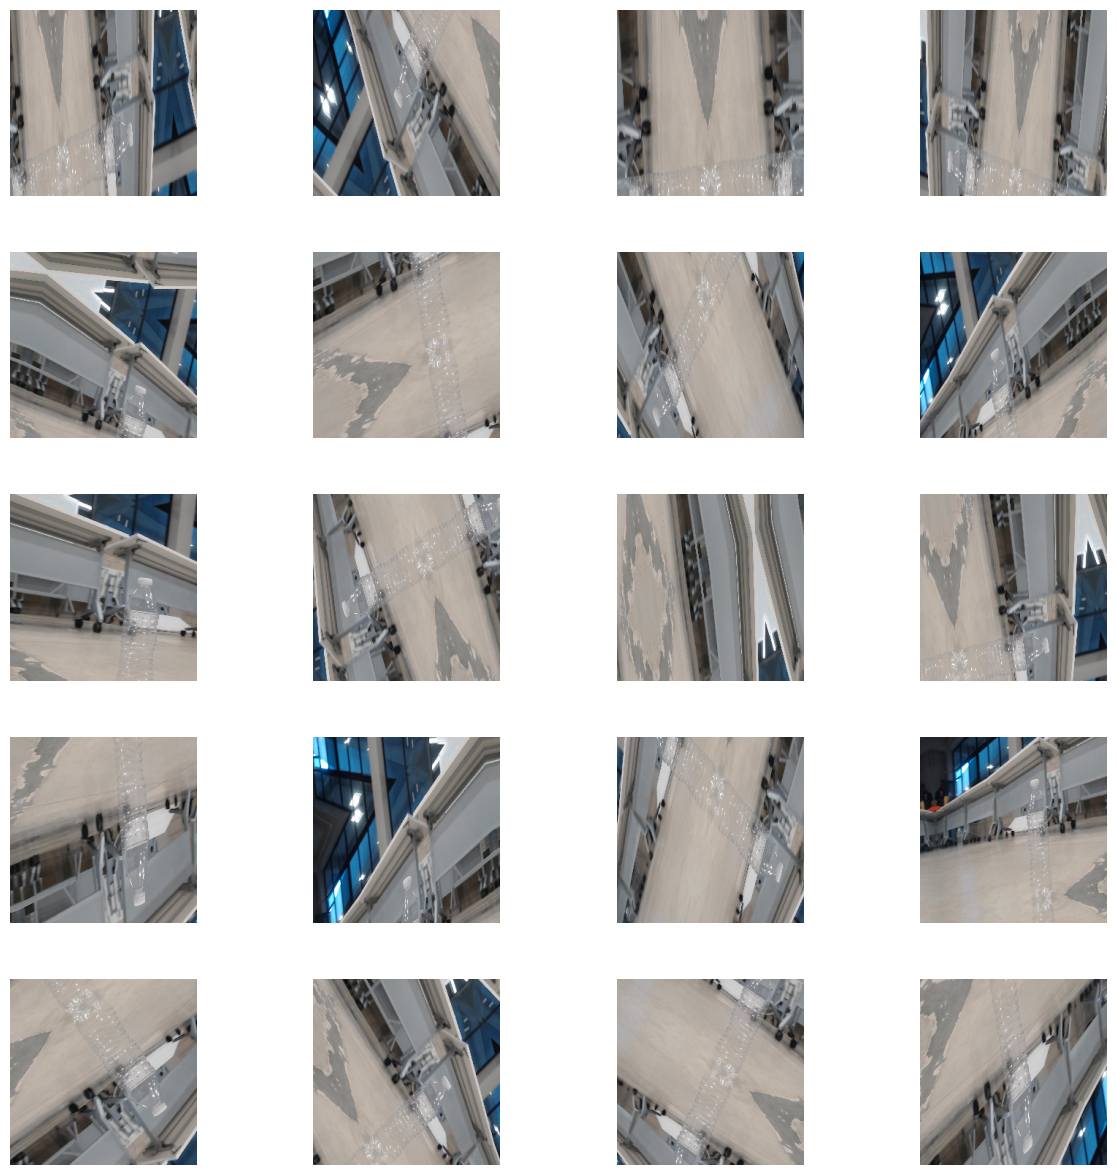

In [ ]:
import math
path_aug = os.path.join(bottles_train_dir, os.listdir(bottles_train_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='bottle', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot(math.ceil(len(preview_img)/4), 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(256, 256),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(256,256), #?
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(256,256), #?
                                                         class_mode='categorical')

Found 6760 images belonging to 2 classes.
Found 2028 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
train_len = 0
for foldername in os.listdir('/tmp/bottle-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/bottle-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('/tmp/bottle-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/bottle-dataset/val',foldername)))

print(train_len)
print(val_len)

6760
2028


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=3,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/3
211/211 [==============================] - 1895s 9s/step - loss: 1.0471 - accuracy: 0.7907 - val_loss: 2.2746 - val_accuracy: 0.4438
Epoch 2/3
211/211 [==============================] - 1804s 9s/step - loss: 0.3511 - accuracy: 0.8805 - val_loss: 3.6553 - val_accuracy: 0.4443
Epoch 3/3
211/211 [==============================] - 1811s 9s/step - loss: 0.1650 - accuracy: 0.9453 - val_loss: 4.0942 - val_accuracy: 0.4867


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(256, 256),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

Found 881 images belonging to 2 classes.
881/881 [==============================] - 55s 62ms/step - loss: 0.7313 - accuracy: 0.4904
accuracy test:  0.4903518855571747


In [ ]:
from keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)

  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Bottle')
  elif np.where(classes[0] == max)[0] == 1:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('No bottle')


plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot(math.ceil(len(image_name)/4), 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(256, 256), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')

In [ ]:
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>